In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

## Initial EDA (Size, Columns, Type of vars)

In [2]:
zf = zipfile.ZipFile('train.zip')
df = pd.read_csv(zf.open('train.csv'))

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
df.isnull().sum()[0]

0

### Finding 1 => Format, data are correct (They has been pre-cleaned).
- Column names are correct and lowercase
- There aren't missing values
- There aren't categorical values then need a transformation


In [6]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


c:\Users\Javier\anaconda3\envs\ml-zoomcamp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of trip duration(secs) in log scale')

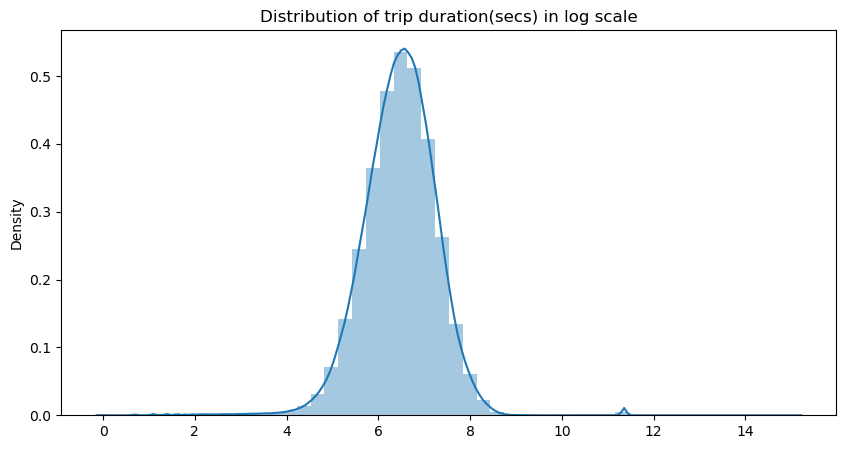

In [7]:
plt.figure(figsize = (10,5))
sns.distplot(np.log(df.trip_duration.values)).set_title('Distribution of trip duration')
plt.title('Distribution of trip duration(secs) in log scale')

In [8]:
df[df.pickup_latitude == 0].count()[0]


0

In [9]:
df[df.pickup_longitude == 0].count()[0]

0

In [10]:
df[df.trip_duration == 0].count()[0]

0

In [11]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)


In [12]:
# Splits train,val,test and extracts target
from sklearn.model_selection import train_test_split

def split_dataframe(dataframe): 
  df_full_train, df_test = train_test_split(dataframe, test_size=0.2, random_state=1)

  df_full_train = df_full_train.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  #y_train = df_train.trip_duration.values
  #y_val = df_val.trip_duration.values
  #y_test = df_test.trip_duration.values

  return df_full_train, df_test

  # df_train.drop(columns=['trip_duration'], inplace=True)
  # df_val.drop(columns=['trip_duration'], inplace=True)

### Metric to use

In [13]:
def rmsle(y, y_pred):
    error = np.log1p(y_pred) - np.log1p(y)
    msle = (error ** 2).mean()
    return np.sqrt(msle)

## Baseline (y_pred = mean(y_train))
### The simplest model. Predictions are always the mean of y_train

In [14]:
def BL_calculate(apply_log=False):
    y_train = df_full_train.trip_duration.values
    y_test = df_test.trip_duration.values

    if apply_log:
      y_train_m = np.log1p(y_train)
    else:
      y_train_m = y_train

    avg = y_train_m.mean()
    y_pred_train = np.full(len(y_train_m),avg)
    y_pred_test =  np.full(len(y_test),avg)

    if apply_log:
      y_pred_train = np.exp(y_pred_train) - 1
      y_pred_test = np.exp(y_pred_test) - 1

    # To avoid values < 0 in RMSLE calculation
    y_pred_train = np.where(y_pred_train < 0, 0, y_pred_train)
    y_pred_test = np.where(y_pred_test < 0, 0, y_pred_test)
    # Calculates and prints metrics
    print('RMSLE train: ',round(rmsle(y_train, y_pred_train),4), ' RMSLE test: ',round(rmsle(y_test, y_pred_test),4))

In [15]:
## We are going to compare baseline model with/without outliers (trip_duration > 6000 secs)
print('Full dataset')
df_full_train, df_test = split_dataframe(df)
BL_calculate(False)
print("Using logarithms")
BL_calculate(True)

print(), print('Without outliers')
df_main = df[(df.trip_duration < 6000)]
df_full_train, df_test = split_dataframe(df_main)
BL_calculate(False)
print("Using logarithms")
BL_calculate(True)

Full dataset
RMSLE train:  0.8908  RMSLE test:  0.891
Using logarithms
RMSLE train:  0.7958  RMSLE test:  0.7955

Without outliers
RMSLE train:  0.8194  RMSLE test:  0.8184
Using logarithms
RMSLE train:  0.774  RMSLE test:  0.7733


### About Baseline:
1. The use of log(target) is useful (to better deal with the long tail with many outliers that I've decided not to remove)


## Linear Regression

In [16]:
from sklearn import linear_model
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold

# Functions to calculate Linear Regression model
def LR_train(df_train, df_val, features, apply_log):
    # OHE
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[features].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    val_dict = df_val[features].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_train = df_train.trip_duration.values

    if apply_log:
      y_train_m = np.log1p(y_train)
    else:
      y_train_m = y_train

    model = linear_model.LinearRegression()
    model.fit(X_train, y_train_m)

    return(model,X_train,X_val)
  
def LR_predict(X_train, X_val, model, apply_log):
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    if apply_log:
      y_pred_train = np.exp(y_pred_train) - 1
      y_pred_val = np.exp(y_pred_val) - 1

    # To avoid values < 0 in RMSLE calculation
    y_pred_train = np.where(y_pred_train < 0, 0, y_pred_train)
    y_pred_val = np.where(y_pred_val < 0, 0, y_pred_val)

    return(y_pred_train, y_pred_val)

def LR_calculate(features, apply_log=False, n_splits=3): # Number of splits for Cross validation by default is 3 because it's a very large dataset
    # Cross-Validating
    print('Doing validation with %s splits' % n_splits)
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores_train = []
    scores_val = []
    fold = 0

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        model, X_train, X_val = LR_train(df_train, df_val, features, apply_log)
        y_pred_train, y_pred_val = LR_predict(X_train, X_val, model, apply_log)

        y_train = df_train.trip_duration.values
        y_val = df_val.trip_duration.values
        scores_train.append(round(rmsle(y_train, y_pred_train),4))
        scores_val.append(round(rmsle(y_val, y_pred_val),4))

        # Calculates and prints metrics
        print(f'Fold {fold} RMSLE train: {round(rmsle(y_train, y_pred_train),4)} RMSLE val: {round(rmsle(y_val, y_pred_val),4)}...')
        fold = fold + 1

    print('Validation results:')
    print('RMSLE_train: %.3f +- %.3f' % (np.mean(scores_train), np.std(scores_train))) 
    print('RMSLE_val: %.3f +- %.3f' % (np.mean(scores_val), np.std(scores_val))) 

    #Final model
    print("Final model...")
    model, X_train, X_test = LR_train(df_full_train, df_test, features, apply_log)
    y_pred_train, y_pred_test = LR_predict(X_train, X_test, model, apply_log)

    y_train = df_full_train.trip_duration.values
    y_test = df_test.trip_duration.values
   
    print('RMSLE train: ',round(rmsle(y_train, y_pred_train),4), ' RMSLE test: ',round(rmsle(y_test, y_pred_test),4))

I start calculation with a set of native features
- I don't use datetime variables or store_and_fwd_flag)
- vendor_id is formatted to string in order to use it as a categorical var in OHE

In [17]:
df.vendor_id = df.vendor_id.astype(str) # To use as a categorical var in OHE
df_full_train, df_test = split_dataframe(df)

In [18]:
features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude']
LR_calculate(features, False)
print(), print("Using logarithms")
LR_calculate(features, True)

Doing validation with 3 splits
Fold 0 RMSLE train: 0.8563 RMSLE val: 0.8553...
Fold 1 RMSLE train: 0.8657 RMSLE val: 0.8666...
Fold 2 RMSLE train: 0.8723 RMSLE val: 0.8727...
Validation results:
RMSLE_train: 0.865 +- 0.007
RMSLE_val: 0.865 +- 0.007
Final model...
RMSLE train:  0.8663  RMSLE test:  0.8676

Using logarithms
Doing validation with 3 splits
Fold 0 RMSLE train: 0.7714 RMSLE val: 0.7655...
Fold 1 RMSLE train: 0.7745 RMSLE val: 0.7768...
Fold 2 RMSLE train: 0.7756 RMSLE val: 0.7768...
Validation results:
RMSLE_train: 0.774 +- 0.002
RMSLE_val: 0.773 +- 0.005
Final model...
RMSLE train:  0.7742  RMSLE test:  0.7788


In [19]:
df_main = df[(df.trip_duration < 6000)]
df_full_train, df_test = split_dataframe(df_main)
features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude']
LR_calculate(features, False)
print(), print("Using logarithms")
LR_calculate(features, True)

Doing validation with 3 splits
Fold 0 RMSLE train: 0.7789 RMSLE val: 0.7801...
Fold 1 RMSLE train: 0.7951 RMSLE val: 0.7955...
Fold 2 RMSLE train: 0.7957 RMSLE val: 0.7948...
Validation results:
RMSLE_train: 0.790 +- 0.008
RMSLE_val: 0.790 +- 0.007
Final model...
RMSLE train:  0.7917  RMSLE test:  0.7905

Using logarithms
Doing validation with 3 splits
Fold 0 RMSLE train: 0.7438 RMSLE val: 0.75...
Fold 1 RMSLE train: 0.7539 RMSLE val: 0.7538...
Fold 2 RMSLE train: 0.7541 RMSLE val: 0.7536...
Validation results:
RMSLE_train: 0.751 +- 0.005
RMSLE_val: 0.752 +- 0.002
Final model...
RMSLE train:  0.752  RMSLE test:  0.757


### Feature engineering
I create new variables in order to:
- Add pickoff_datetime derived information to the model
- Add calculated geographical information that could help the model (distance, compass direction)

In [20]:
# Extract month, weekday an hour from pickup_datetime. Se convierten en str para que se reconozcan como variables categóricas en OHE
df_tmp = df
df_tmp.pickup_datetime = pd.to_datetime(df_tmp.pickup_datetime)
df_tmp['month'] = df_tmp.pickup_datetime.dt.month.astype(str)
df_tmp['weekday'] = df_tmp.pickup_datetime.dt.weekday.astype(str)
df_tmp['hour'] = df_tmp.pickup_datetime.dt.hour.astype(str)
df_full_train, df_test = split_dataframe(df_tmp)

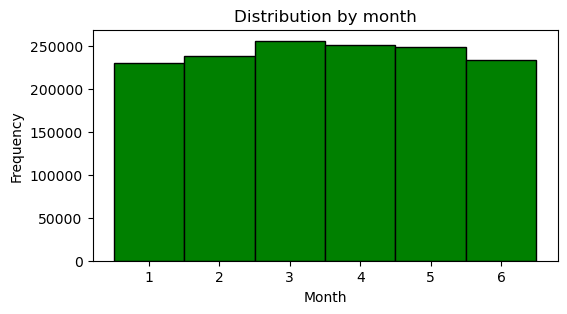

In [34]:
plt.figure(figsize=(6, 3))
sns.histplot(sorted(df.month.values), bins=40, color='green', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Month')
plt.title('Distribution by month')
plt.show()

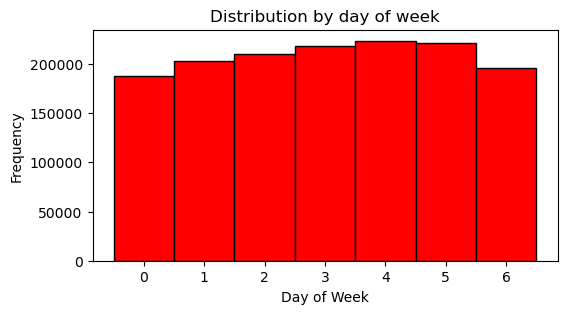

In [32]:
plt.figure(figsize=(6, 3))
sns.histplot(sorted(df.weekday.values), bins=40, color='red', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Day of Week')
plt.title('Distribution by day of week')
plt.show()

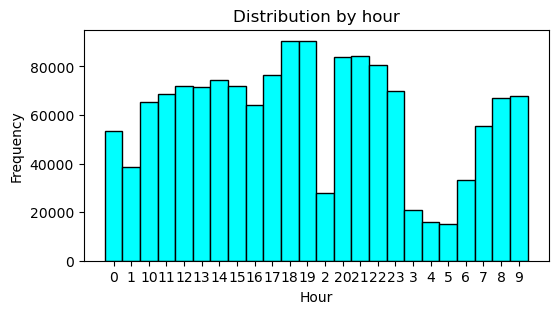

In [33]:
plt.figure(figsize=(6, 3))
sns.histplot(sorted(df.hour.values), bins=40, color='cyan', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Hour')
plt.title('Distribution by hour')
plt.show()

In [22]:
features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'month',
            'weekday', 'hour']
LR_calculate(features, False)
print(), print("Using logarithms")
LR_calculate(features, True)

Doing validation with 3 splits
Fold 0 RMSLE train: 0.8486 RMSLE val: 0.8477...
Fold 1 RMSLE train: 0.8579 RMSLE val: 0.8594...
Fold 2 RMSLE train: 0.8658 RMSLE val: 0.8657...
Validation results:
RMSLE_train: 0.857 +- 0.007
RMSLE_val: 0.858 +- 0.007
Final model...
RMSLE train:  0.8586  RMSLE test:  0.86

Using logarithms
Doing validation with 3 splits
Fold 0 RMSLE train: 0.7632 RMSLE val: 0.7569...
Fold 1 RMSLE train: 0.7662 RMSLE val: 0.7688...
Fold 2 RMSLE train: 0.7674 RMSLE val: 0.7688...
Validation results:
RMSLE_train: 0.766 +- 0.002
RMSLE_val: 0.765 +- 0.006
Final model...
RMSLE train:  0.766  RMSLE test:  0.7713


In [23]:
# Functions to calculate Haversine distance & Compass direction
def hDistance(lat1, lng1, lat2, lng2):
  lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
  R = 6371 #Earth radius
  lat = lat2 - lat1
  lng = lng2 - lng1
  d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
  h = 2 * R * np.arcsin(np.sqrt(d))
  return h

def cDirection(lat1, lng1, lat2, lng2):
  lng_delta_rad = np.radians(lng2 - lng1)
  lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
  y = np.sin(lng_delta_rad) * np.cos(lat2)
  x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
  return np.degrees(np.arctan2(y, x))

In [24]:
df_tmp = df
df_tmp['hdistance'] = hDistance(df_tmp.pickup_latitude.values, df_tmp.pickup_longitude.values, df_tmp.dropoff_latitude.values, df_tmp.dropoff_longitude.values)
df_tmp['cdirection'] = cDirection(df_tmp.pickup_latitude.values, df_tmp.pickup_longitude.values, df_tmp.dropoff_latitude.values, df_tmp.dropoff_longitude.values)
df_full_train, df_test = split_dataframe(df_tmp)

C:\Users\jmora\AppData\Local\Temp\ipykernel_14020\2339233699.py:3: RuntimeWarning: divide by zero encountered in log
  sns.histplot(np.log(df.hdistance.values), bins=40, color='cyan', alpha=1)


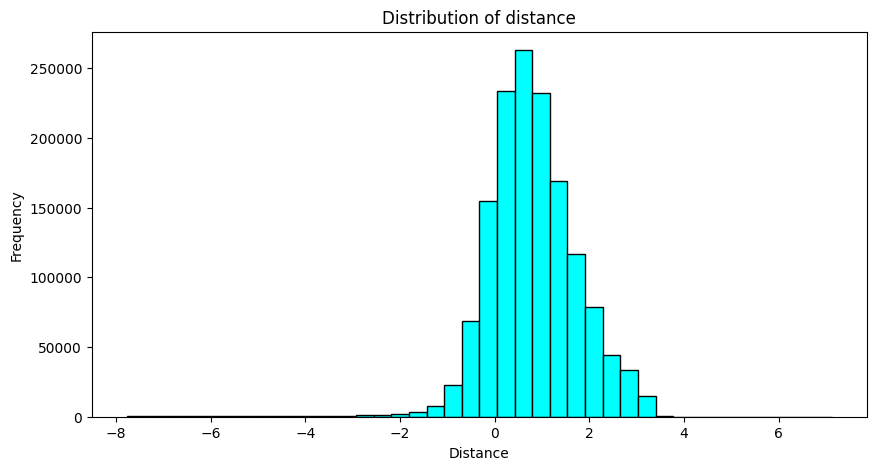

In [58]:
plt.figure(figsize=(10, 5))

sns.histplot(np.log(df.hdistance.values), bins=40, color='cyan', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Distance')
plt.title('Distribution of distance')

plt.show()

In [25]:
features = ['hdistance']
LR_calculate(features, False)
print("Using logarithms")
LR_calculate(features, True)

Doing validation with 3 splits
Fold 0 RMSLE train: 0.6721 RMSLE val: 0.6698...
Fold 1 RMSLE train: 0.6898 RMSLE val: 0.6915...
Fold 2 RMSLE train: 0.7003 RMSLE val: 0.7009...
Validation results:
RMSLE_train: 0.687 +- 0.012
RMSLE_val: 0.687 +- 0.013
Final model...
RMSLE train:  0.6881  RMSLE test:  0.6883
Using logarithms
Doing validation with 3 splits
Fold 0 RMSLE train: 0.636 RMSLE val: 0.6939...
Fold 1 RMSLE train: 0.6587 RMSLE val: 0.6443...
Fold 2 RMSLE train: 0.6634 RMSLE val: 0.6358...
Validation results:
RMSLE_train: 0.653 +- 0.012
RMSLE_val: 0.658 +- 0.026
Final model...
RMSLE train:  0.6538  RMSLE test:  0.6442


In [26]:
features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'month',
            'weekday', 'hour', 'hdistance', 'cdirection']
LR_calculate(features, False)
print("Using logarithms")
LR_calculate(features, True)

Doing validation with 3 splits
Fold 0 RMSLE train: 0.6593 RMSLE val: 0.6577...
Fold 1 RMSLE train: 0.6768 RMSLE val: 0.6789...
Fold 2 RMSLE train: 0.689 RMSLE val: 0.6881...
Validation results:
RMSLE_train: 0.675 +- 0.012
RMSLE_val: 0.675 +- 0.013
Final model...
RMSLE train:  0.6756  RMSLE test:  0.6768
Using logarithms
Doing validation with 3 splits
Fold 0 RMSLE train: 0.6151 RMSLE val: 0.6955...
Fold 1 RMSLE train: 0.6401 RMSLE val: 0.6256...
Fold 2 RMSLE train: 0.6419 RMSLE val: 0.6247...
Validation results:
RMSLE_train: 0.632 +- 0.012
RMSLE_val: 0.649 +- 0.033
Final model...
RMSLE train:  0.635  RMSLE test:  0.6313


### Findings about Linear Regression model and Feature Engineering
1. It can be confirmed that using log(target) is useful
2. Adding several calculated features slightly improve the results (specially Haversine distance)
3. But, as a summary, Linear regression doesn't seem to significantly improve the results of the baseline model

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Functions to calculate Decision Tree model
def DT_train(df_train, df_val, features, max_d, apply_log):
    X_train = df_train[features].values
    X_val = df_val[features].values

    y_train = df_train.trip_duration.values

    if apply_log:
      y_train_m = np.log1p(y_train)
    else:
      y_train_m = y_train

    model = DecisionTreeRegressor(max_depth=max_d, random_state=1)
    model.fit(X_train, y_train_m)

    return(model,X_train,X_val)
  
def DT_predict(X_train, X_val, model, apply_log):
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    if apply_log:
      y_pred_train = np.exp(y_pred_train) - 1
      y_pred_val = np.exp(y_pred_val) - 1

    # To avoid values < 0 in RMSLE calculation
    y_pred_train = np.where(y_pred_train < 0, 0, y_pred_train)
    y_pred_val = np.where(y_pred_val < 0, 0, y_pred_val)

    return(y_pred_train, y_pred_val)

def DT_calculate(features, max_d=None, apply_log=False, print_ft_tree=False, n_splits=3):
    # Cross-Validating
    print('Doing validation with %s splits' % n_splits)
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores_train = []
    scores_val = []
    fold = 0

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        model, X_train, X_val = DT_train(df_train, df_val, features, max_d, apply_log)
        y_pred_train, y_pred_val = DT_predict(X_train, X_val, model, apply_log)

        y_train = df_train.trip_duration.values
        y_val = df_val.trip_duration.values
        scores_train.append(round(rmsle(y_train, y_pred_train),4))
        scores_val.append(round(rmsle(y_val, y_pred_val),4))

        # Calculates and prints metrics
        print(f'Fold {fold} RMSLE train: {round(rmsle(y_train, y_pred_train),4)} RMSLE val: {round(rmsle(y_val, y_pred_val),4)}...')
        fold = fold + 1

    print('Validation results:')
    print('RMSLE_train: %.3f +- %.3f' % (np.mean(scores_train), np.std(scores_train))) 
    print('RMSLE_val: %.3f +- %.3f' % (np.mean(scores_val), np.std(scores_val))) 

    #Final model
    print("Final model...")
    model, X_train, X_test = DT_train(df_full_train, df_test, features, max_d, apply_log)
    y_pred_train, y_pred_test = DT_predict(X_train, X_test, model, apply_log)

    y_train = df_full_train.trip_duration.values
    y_test = df_test.trip_duration.values
   
    print('RMSLE train: ',round(rmsle(y_train, y_pred_train),4), ' RMSLE test: ',round(rmsle(y_test, y_pred_test),4))
 
    # Feature importances
    if print_ft_tree:
      print('Feature importances')
      for n,value in enumerate(features):
        print(features[n],': ',model.feature_importances_[n])
      
    if print_ft_tree:
      # Tree
      print('DecisionTree')
      print(export_text(model, feature_names=features))

    return(round(rmsle(y_val, y_pred_val),4), model)

In [28]:
# Reloading the dataset (for remove OHE adaptations because Tree-based models work better without OHE)
zf = zipfile.ZipFile('train.zip')
df = pd.read_csv(zf.open('train.csv'))

df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df['month'] = df.pickup_datetime.dt.month
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour
df['hdistance'] = hDistance(df.pickup_latitude.values, df.pickup_longitude.values, df.dropoff_latitude.values, df.dropoff_longitude.values)
df['cdirection'] = cDirection(df.pickup_latitude.values, df.pickup_longitude.values, df.dropoff_latitude.values, df.dropoff_longitude.values)

df_full_train, df_test = split_dataframe(df)

In [29]:
features = ['vendor_id','passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'month',
            'weekday', 'hour', 'hdistance', 'cdirection']
DT_calculate(features, 10, False, True)

Doing validation with 3 splits
Fold 0 RMSLE train: 0.5705 RMSLE val: 0.5743...
Fold 1 RMSLE train: 0.5578 RMSLE val: 0.5664...
Fold 2 RMSLE train: 0.5741 RMSLE val: 0.5786...
Validation results:
RMSLE_train: 0.567 +- 0.007
RMSLE_val: 0.573 +- 0.005
Final model...
RMSLE train:  0.5647  RMSLE test:  0.5707
Feature importances
vendor_id :  0.0005142425347482115
passenger_count :  0.0004182887413604203
pickup_longitude :  0.003536088069233246
pickup_latitude :  0.17225162166698807
dropoff_longitude :  0.002231794566748998
dropoff_latitude :  0.0037155385955981854
month :  0.00010405965800960076
weekday :  0.45261559803504114
hour :  0.002200385112018342
hdistance :  0.1341723851916099
cdirection :  0.22823999782864396
DecisionTree
|--- hdistance <= 4.50
|   |--- hdistance <= 1.62
|   |   |--- vendor_id <= 1.50
|   |   |   |--- hdistance <= 1.06
|   |   |   |   |--- hdistance <= 0.82
|   |   |   |   |   |--- dropoff_latitude <= 40.77
|   |   |   |   |   |   |--- hour <= 7.50
|   |   |   |  

(0.5786, DecisionTreeRegressor(max_depth=10, random_state=1))

In [30]:
features = ['vendor_id','passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'month',
            'weekday', 'hour', 'hdistance', 'cdirection']
print(), print("Using logarithms...")
DT_calculate(features, 10, True, True, 4)


Using logarithms...
Doing validation with 4 splits
Fold 0 RMSLE train: 0.4369 RMSLE val: 0.4444...
Fold 1 RMSLE train: 0.4369 RMSLE val: 0.4448...
Fold 2 RMSLE train: 0.4366 RMSLE val: 0.4446...
Fold 3 RMSLE train: 0.4372 RMSLE val: 0.4442...
Validation results:
RMSLE_train: 0.437 +- 0.000
RMSLE_val: 0.445 +- 0.000
Final model...
RMSLE train:  0.4377  RMSLE test:  0.4438
Feature importances
vendor_id :  0.008736595518623519
passenger_count :  0.0005394929410096663
pickup_longitude :  0.002840166196879395
pickup_latitude :  0.0024028791500356477
dropoff_longitude :  0.004303543989660679
dropoff_latitude :  0.02830193803227004
month :  0.0005909300883379854
weekday :  0.014831604771267498
hour :  0.0501993660131236
hdistance :  0.8617800307605192
cdirection :  0.0254734525382727
DecisionTree
|--- hdistance <= 2.11
|   |--- hdistance <= 0.98
|   |   |--- hdistance <= 0.53
|   |   |   |--- hdistance <= 0.07
|   |   |   |   |--- vendor_id <= 1.50
|   |   |   |   |   |--- hdistance <= 0.02


(0.4442, DecisionTreeRegressor(max_depth=10, random_state=1))

### Findings about Decission Tree model
1. A great improvement in the metric compared to the Linear Regression model, specially using logarithms
2. The importance of `hdistance` (> 86%) is much higher than that of the other variables

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Functions to calculate Decision Tree model
def RF_train(df_train, df_val, features, n_est, max_d, apply_log):
    X_train = df_train[features].values
    X_val = df_val[features].values

    y_train = df_train.trip_duration.values

    if apply_log:
      y_train_m = np.log1p(y_train)
    else:
      y_train_m = y_train

    model = RandomForestRegressor(n_estimators=n_est, max_depth=max_d, random_state=1, n_jobs=-1)
    model.fit(X_train, y_train_m)


    return(model,X_train,X_val)
  
def RF_predict(X_train, X_val, model, apply_log):
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    if apply_log:
      y_pred_train = np.exp(y_pred_train) - 1
      y_pred_val = np.exp(y_pred_val) - 1

    # To avoid values < 0 in RMSLE calculation
    y_pred_train = np.where(y_pred_train < 0, 0, y_pred_train)
    y_pred_val = np.where(y_pred_val < 0, 0, y_pred_val)

    return(y_pred_train, y_pred_val)

def RF_calculate(features, n_est=100, max_d=None, apply_log=False, print_ft=False, print_kfold=True, n_splits=3):
    # Cross-Validating
    if print_kfold: print('Doing validation with %s splits' % n_splits)
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores_train = []
    scores_val = []
    fold = 0

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        model, X_train, X_val = RF_train(df_train, df_val, features, n_est, max_d, apply_log)
        y_pred_train, y_pred_val = RF_predict(X_train, X_val, model, apply_log)

        y_train = df_train.trip_duration.values
        y_val = df_val.trip_duration.values
        scores_train.append(round(rmsle(y_train, y_pred_train),4))
        scores_val.append(round(rmsle(y_val, y_pred_val),4))

        # Calculates and prints metrics
        if print_kfold: print(f'Fold {fold} RMSLE train: {round(rmsle(y_train, y_pred_train),4)} RMSLE val: {round(rmsle(y_val, y_pred_val),4)}...')
        fold = fold + 1

    if print_kfold: print('Validation results:')
    if print_kfold: print('RMSLE_train: %.3f +- %.3f' % (np.mean(scores_train), np.std(scores_train))) 
    if print_kfold: print('RMSLE_val: %.3f +- %.3f' % (np.mean(scores_val), np.std(scores_val))) 

    #Final model
    print("Final model...")
    model, X_train, X_test = RF_train(df_full_train, df_test, features, n_est, max_d, apply_log)
    y_pred_train, y_pred_test = RF_predict(X_train, X_test, model, apply_log)

    y_train = df_full_train.trip_duration.values
    y_test = df_test.trip_duration.values
   
    print('RMSLE train: ',round(rmsle(y_train, y_pred_train),4), ' RMSLE test: ',round(rmsle(y_test, y_pred_test),4))
 
    # Feature importances
    if print_ft:
      print('Feature importances')
      for n,value in enumerate(features):
        print(features[n],': ',model.feature_importances_[n])
      
    return(round(rmsle(y_train, y_pred_train),4), round(rmsle(y_val, y_pred_val),4), model)

In [32]:
features = ['vendor_id','passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'month',
            'weekday', 'hour', 'hdistance', 'cdirection']
RF_calculate(features, 100, 10, False, True, True)

Doing validation with 3 splits
Fold 0 RMSLE train: 0.5548 RMSLE val: 0.5694...
Fold 1 RMSLE train: 0.5461 RMSLE val: 0.5659...
Fold 2 RMSLE train: 0.5554 RMSLE val: 0.5721...
Validation results:
RMSLE_train: 0.552 +- 0.004
RMSLE_val: 0.569 +- 0.003
Final model...
RMSLE train:  0.5543  RMSLE test:  0.568
Feature importances
vendor_id :  0.011716556723326797
passenger_count :  0.0025111546784054787
pickup_longitude :  0.03406089283831836
pickup_latitude :  0.39136203620012316
dropoff_longitude :  0.029026277868481932
dropoff_latitude :  0.0198917393181993
month :  0.018237209147397303
weekday :  0.03238271918168753
hour :  0.045964215273996384
hdistance :  0.27348973920822955
cdirection :  0.1413574595618342


(0.5543,
 0.5721,
 RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=1))

In [33]:
print("Using logarithms...")
RF_calculate(features, 100, 10, True, True, True)

Using logarithms...
Doing validation with 3 splits
Fold 0 RMSLE train: 0.4267 RMSLE val: 0.4334...
Fold 1 RMSLE train: 0.4253 RMSLE val: 0.4361...
Fold 2 RMSLE train: 0.4269 RMSLE val: 0.4333...
Validation results:
RMSLE_train: 0.426 +- 0.001
RMSLE_val: 0.434 +- 0.001
Final model...
RMSLE train:  0.4292  RMSLE test:  0.4346
Feature importances
vendor_id :  0.008859095663462787
passenger_count :  0.0007805817543806607
pickup_longitude :  0.0037109662378329057
pickup_latitude :  0.0034100670814346465
dropoff_longitude :  0.004286966620745302
dropoff_latitude :  0.028660160545879824
month :  0.000631728217249032
weekday :  0.014695173625635318
hour :  0.049909658112041046
hdistance :  0.8587452831992137
cdirection :  0.026310318942124707


(0.4292,
 0.4333,
 RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=1))

For a performance issue, we are going to reduce the dataset size to 10%, cross-validate this approach, and compare to previous results with the full dataset...

In [39]:
features = ['vendor_id','passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'month',
            'weekday', 'hour', 'hdistance', 'cdirection']
n_splits = 3
scores_train = []
scores_test = []

print("Using logarithms...")

print('Doing validation with %s splits' % n_splits)
for n in range(n_splits):
  df_rest, df_tmp = train_test_split(df, test_size=0.1, random_state=n)
  df_full_train, df_test = split_dataframe(df_tmp)

  rmsle_train, rmsle_test, model = RF_calculate(features, 100, 10, True, False, False)

  scores_train.append(rmsle_train)
  scores_test.append(rmsle_test)

print()
print('RMSLE_train: %.3f +- %.3f' % (np.mean(scores_train), np.std(scores_train))) 
print('RMSLE_val: %.3f +- %.3f' % (np.mean(scores_test), np.std(scores_test)))

Using logarithms...
Doing validation with 3 splits
Final model...
RMSLE train:  0.4038  RMSLE test:  0.4246
Final model...
RMSLE train:  0.3958  RMSLE test:  0.4463
Final model...
RMSLE train:  0.3987  RMSLE test:  0.4285

RMSLE_train: 0.399 +- 0.003
RMSLE_val: 0.433 +- 0.005


...and the results are practically the same. So we can use only 10% of the dataset to explore the different models.

### Findings about Random Forest model and Feature Engineering
1. As expected, Random Forest model shows better results than Tree Decision model
2. Using logarithms gives better results (and feature importances seem more logical), so from now on models will only be evaluated with them
3. To reduce the time required to train the models, the dataset size has been reduced to 10%. As the results are consistent, from now on the models will be evaluated using the reduced data set

In [40]:
df_rest, df_tmp = train_test_split(df, test_size=0.1, random_state=1)
df_full_train, df_test = split_dataframe(df_tmp)

## XGBoost

In [41]:
import xgboost as xgb

# Functions to calculate XGBoost model
def XGB_train(df_train, df_val, features, xgb_params, num_rounds, apply_log):
    X_train = df_train[features].values
    X_val = df_val[features].values

    y_train = df_train.trip_duration.values

    if apply_log:
      y_train_m = np.log1p(y_train)
    else:
      y_train_m = y_train

    dtrain = xgb.DMatrix(X_train, label=y_train_m, feature_names=features)
    dval = xgb.DMatrix(X_val, feature_names=features)
    model = xgb.train(xgb_params, dtrain, num_boost_round=num_rounds)

    return(model,dtrain,dval)
  
def XGB_predict(dtrain, dval, model, apply_log):
    y_pred_train = model.predict(dtrain)
    y_pred_val = model.predict(dval)

    if apply_log:
      y_pred_train = np.exp(y_pred_train) - 1
      y_pred_val = np.exp(y_pred_val) - 1

    # To avoid values < 0 in RMSLE calculation
    y_pred_train = np.where(y_pred_train < 0, 0, y_pred_train)
    y_pred_val = np.where(y_pred_val < 0, 0, y_pred_val)

    return(y_pred_train, y_pred_val)

def XGB_calculate(features, xgb_params, num_rounds=100, apply_log=False, print_kfold=True, print_summary=True,_splits=3):
    # Cross-Validating
    print('ETA: ', xgb_params['eta'], 'max_depth: ', xgb_params['max_depth'], 'num_rounds: ', num_rounds)
    if print_kfold: print('Doing validation with %s splits' % n_splits)
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores_train = []
    scores_val = []
    fold = 0

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        model, dtrain, dval = XGB_train(df_train, df_val, features, xgb_params, num_rounds, apply_log)
        y_pred_train, y_pred_val = XGB_predict(dtrain, dval, model, apply_log)

        y_train = df_train.trip_duration.values
        y_val = df_val.trip_duration.values
        scores_train.append(round(rmsle(y_train, y_pred_train),4))
        scores_val.append(round(rmsle(y_val, y_pred_val),4))

        # Calculates and prints metrics
        if print_kfold: print(f'Fold {fold} RMSLE train: {round(rmsle(y_train, y_pred_train),4)} RMSLE val: {round(rmsle(y_val, y_pred_val),4)}...')
        fold = fold + 1

    if print_kfold: print('Validation results:')
    if print_kfold: print('RMSLE_train: %.3f +- %.3f' % (np.mean(scores_train), np.std(scores_train))) 
    if print_kfold: print('RMSLE_val: %.3f +- %.3f' % (np.mean(scores_val), np.std(scores_val))) 

    #Final model
    if print_summary: print("Final model...")
    model, dtrain, dtest = XGB_train(df_full_train, df_test, features, xgb_params, num_rounds, apply_log)
    y_pred_train, y_pred_test = XGB_predict(dtrain, dtest, model, apply_log)

    y_train = df_full_train.trip_duration.values
    y_test = df_test.trip_duration.values
   
    if print_summary: print('RMSLE train: ',round(rmsle(y_train, y_pred_train),4), ' RMSLE test: ',round(rmsle(y_test, y_pred_test),4))
      
    return [xgb_params['eta'], xgb_params['max_depth'], num_rounds,
          round(rmsle(y_train, y_pred_train),4), round(rmsle(y_test, y_pred_test),4)
          ], model

In [42]:
features = ['vendor_id','passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'month',
            'weekday', 'hour', 'hdistance', 'cdirection']
xgb_params = {'eta': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'objective': 'reg:squarederror', 'nthread': 8, 'seed': 1, 'verbosity': 1}
a, model = XGB_calculate(features, xgb_params, 100, False, True)
a, model = XGB_calculate(features, xgb_params, 100, True, True)

ETA:  0.1 max_depth:  10 num_rounds:  100
Doing validation with 3 splits
Fold 0 RMSLE train: 0.4092 RMSLE val: 0.5709...
Fold 1 RMSLE train: 0.4284 RMSLE val: 0.5783...
Fold 2 RMSLE train: 0.4006 RMSLE val: 0.5583...
Validation results:
RMSLE_train: 0.413 +- 0.012
RMSLE_val: 0.569 +- 0.008
Final model...
RMSLE train:  0.4408  RMSLE test:  0.5875
ETA:  0.1 max_depth:  10 num_rounds:  100
Doing validation with 3 splits
Fold 0 RMSLE train: 0.2647 RMSLE val: 0.4029...
Fold 1 RMSLE train: 0.2663 RMSLE val: 0.3941...
Fold 2 RMSLE train: 0.2659 RMSLE val: 0.4022...
Validation results:
RMSLE_train: 0.266 +- 0.001
RMSLE_val: 0.400 +- 0.004
Final model...
RMSLE train:  0.2832  RMSLE test:  0.4152


### Findings about XGBoost
XGBoost models (using logarithms) outperforms previous models (tested under similar conditions), making XGBoost the model type of choice

### Tuning XGB parameters
Let's try to find the best parameters by iterating over the main ones (Eta, max_depth, num_boot_round) and storing the results for analysis.

(Warning => It is a time-consuming process)

In [46]:
scores=[]

features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'month',
            'weekday', 'hour', 'hdistance', 'cdirection']            
for eta in [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]:
  for md in [2, 4, 6, 10, 15]:
    for nb in [10, 20, 30, 50, 100, 200, 500]:
      xgb_params = {'eta': eta, 'max_depth': md, 'min_child_weight': 1, 'objective': 'reg:squarederror', 'nthread': 8, 'seed': 1, 'verbosity': 1}
      sc,model= XGB_calculate(features, xgb_params, nb, True, False, False)
      scores.append(sc)

df_scores =pd.DataFrame(scores,columns=['eta', 'max_depth', 'num_rounds', 'rmsle_train', 'rmsle_val'])

df_scores.describe()

ETA:  0.01 max_depth:  2 num_rounds:  10
ETA:  0.01 max_depth:  2 num_rounds:  20
ETA:  0.01 max_depth:  2 num_rounds:  30
ETA:  0.01 max_depth:  2 num_rounds:  50
ETA:  0.01 max_depth:  2 num_rounds:  100
ETA:  0.01 max_depth:  2 num_rounds:  200
ETA:  0.01 max_depth:  2 num_rounds:  500
ETA:  0.01 max_depth:  4 num_rounds:  10
ETA:  0.01 max_depth:  4 num_rounds:  20
ETA:  0.01 max_depth:  4 num_rounds:  30
ETA:  0.01 max_depth:  4 num_rounds:  50
ETA:  0.01 max_depth:  4 num_rounds:  100
ETA:  0.01 max_depth:  4 num_rounds:  200
ETA:  0.01 max_depth:  4 num_rounds:  500
ETA:  0.01 max_depth:  6 num_rounds:  10
ETA:  0.01 max_depth:  6 num_rounds:  20
ETA:  0.01 max_depth:  6 num_rounds:  30
ETA:  0.01 max_depth:  6 num_rounds:  50
ETA:  0.01 max_depth:  6 num_rounds:  100
ETA:  0.01 max_depth:  6 num_rounds:  200
ETA:  0.01 max_depth:  6 num_rounds:  500
ETA:  0.01 max_depth:  10 num_rounds:  10
ETA:  0.01 max_depth:  10 num_rounds:  20
ETA:  0.01 max_depth:  10 num_rounds:  30
ETA:

,eta,max_depth,num_rounds,rmsle_train,rmsle_val
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.193333,7.400000,130.000000,1.013360,1.099098
std,0.167898,4.641399,163.221164,1.380859,1.337005
min,0.010000,2.000000,10.000000,0.003600,0.412700
25%,0.050000,4.000000,20.000000,0.313575,0.426825
50%,0.150000,6.000000,50.000000,0.407150,0.445900
75%,0.300000,10.000000,200.000000,0.845425,0.862050
max,0.500000,15.000000,500.000000,5.448500,5.451800


In [49]:
df_scores.sort_values("rmsle_val").head(20)

,eta,max_depth,num_rounds,rmsle_train,rmsle_val
62,0.05,10,500,0.2414,0.4127
61,0.05,10,200,0.2808,0.4141
96,0.10,10,200,0.2537,0.4145
95,0.10,10,100,0.2832,0.4152
97,0.10,10,500,0.2042,0.4152
55,0.05,6,500,0.3486,0.4159
90,0.10,6,500,0.3224,0.4164
69,0.05,15,500,0.0997,0.4169
124,0.20,6,200,0.3311,0.4171
68,0.05,15,200,0.1439,0.4172


We are going to focus on the area of ​​interest with more defined values

(Warning => It is a time-consuming process)

In [50]:
scores=[]

features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'month',
            'weekday', 'hour', 'hdistance', 'cdirection']            
for eta in [0.02, 0.03, 0.04, 0.05]:
  for md in [6, 7, 8, 9, 10]:
    for nb in [100, 200, 500, 700]:
      xgb_params = {'eta': eta, 'max_depth': md, 'min_child_weight': 1, 'objective': 'reg:squarederror', 'nthread': 8, 'seed': 1, 'verbosity': 1}
      sc,model= XGB_calculate(features, xgb_params, nb, True, False, False)
      scores.append(sc)

df_scores =pd.DataFrame(scores,columns=['eta', 'max_depth', 'num_rounds', 'rmsle_train', 'rmsle_val'])

df_scores.describe()

ETA:  0.02 max_depth:  6 num_rounds:  100
ETA:  0.02 max_depth:  6 num_rounds:  200
ETA:  0.02 max_depth:  6 num_rounds:  500
ETA:  0.02 max_depth:  6 num_rounds:  700
ETA:  0.02 max_depth:  7 num_rounds:  100
ETA:  0.02 max_depth:  7 num_rounds:  200
ETA:  0.02 max_depth:  7 num_rounds:  500
ETA:  0.02 max_depth:  7 num_rounds:  700
ETA:  0.02 max_depth:  8 num_rounds:  100
ETA:  0.02 max_depth:  8 num_rounds:  200
ETA:  0.02 max_depth:  8 num_rounds:  500
ETA:  0.02 max_depth:  8 num_rounds:  700
ETA:  0.02 max_depth:  9 num_rounds:  100
ETA:  0.02 max_depth:  9 num_rounds:  200
ETA:  0.02 max_depth:  9 num_rounds:  500
ETA:  0.02 max_depth:  9 num_rounds:  700
ETA:  0.02 max_depth:  10 num_rounds:  100
ETA:  0.02 max_depth:  10 num_rounds:  200
ETA:  0.02 max_depth:  10 num_rounds:  500
ETA:  0.02 max_depth:  10 num_rounds:  700
ETA:  0.03 max_depth:  6 num_rounds:  100
ETA:  0.03 max_depth:  6 num_rounds:  200
ETA:  0.03 max_depth:  6 num_rounds:  500
ETA:  0.03 max_depth:  6 num_r

,eta,max_depth,num_rounds,rmsle_train,rmsle_val
count,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.035000,8.000000,375.000000,0.375997,0.457584
std,0.011251,1.423136,239.989451,0.147557,0.121894
min,0.020000,6.000000,100.000000,0.223500,0.412700
25%,0.027500,7.000000,175.000000,0.305850,0.414175
50%,0.035000,8.000000,350.000000,0.343700,0.416750
75%,0.042500,9.000000,550.000000,0.377175,0.433500
max,0.050000,10.000000,700.000000,0.908400,0.920800


In [52]:
df_scores.sort_values("rmsle_val").head(20)

,eta,max_depth,num_rounds,rmsle_train,rmsle_val
78,0.05,10,500,0.2414,0.4127
79,0.05,10,700,0.2235,0.4128
47,0.04,7,700,0.3223,0.4132
19,0.02,10,700,0.2692,0.4132
39,0.03,10,700,0.2547,0.4132
51,0.04,8,700,0.2957,0.4133
35,0.03,9,700,0.2842,0.4135
71,0.05,8,700,0.2875,0.4135
70,0.05,8,500,0.3003,0.4135
50,0.04,8,500,0.3083,0.4135


Heatmap ETA - Max_depth (Num_rounds=500 because the smallest RMSLE is obtained with this number of iterations)

<AxesSubplot: xlabel='None-max_depth', ylabel='eta'>

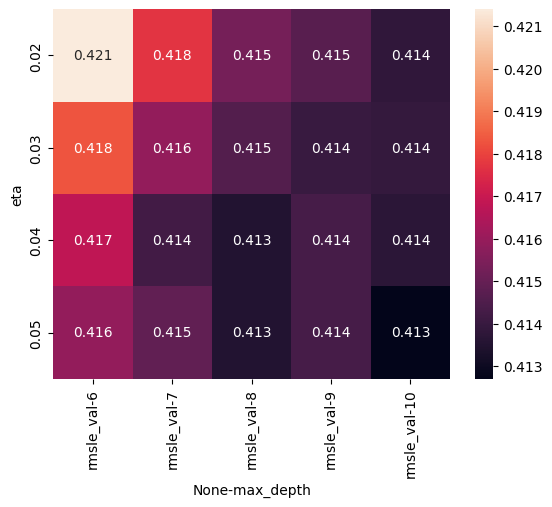

In [53]:
df_scores_pivot = df_scores[df_scores.num_rounds == 500].pivot(index='eta', columns=['max_depth'], values=['rmsle_val'])
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

The best parameters of the set are ETA=0.05 and max_depth=10. We can plot RMSLE vs iterations

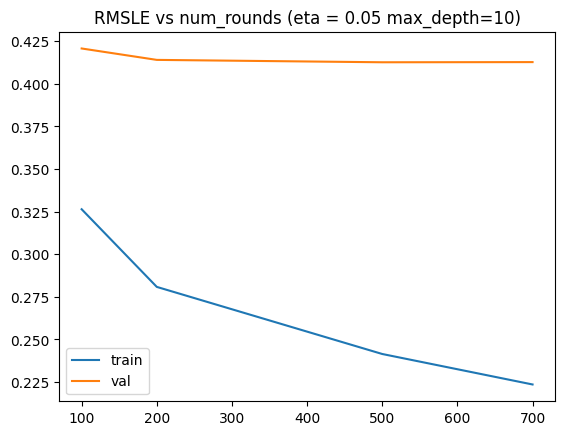

In [54]:
df_scores_plot = df_scores.query('eta == 0.05 and max_depth == 10')
plt.plot(df_scores_plot.num_rounds, df_scores_plot.rmsle_train, label='train')
plt.plot(df_scores_plot.num_rounds, df_scores_plot.rmsle_val, label='val')
plt.title('RMSLE vs num_rounds (eta = 0.05 max_depth=10)')
plt.legend()

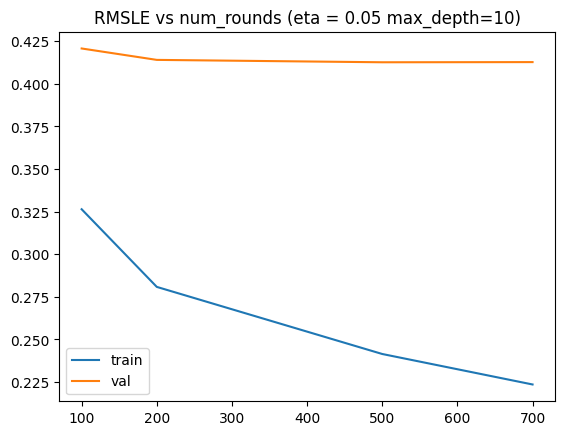

In [55]:
df_scores_plot = df_scores.query('eta == 0.05 and max_depth == 10 and num_rounds >= 100')
plt.plot(df_scores_plot.num_rounds, df_scores_plot.rmsle_train, label='train')
plt.plot(df_scores_plot.num_rounds, df_scores_plot.rmsle_val, label='val')
plt.title('RMSLE vs num_rounds (eta = 0.05 max_depth=10)')
plt.legend()

In a more detailed chart it can be seen that from 200 iterations the overfitting increases but there is almost no real improvement

#### And finally we are going to validate the winning model (using the entire dataset)

In [56]:
df_full_train, df_test = split_dataframe(df)

features = ['vendor_id','passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'month',
            'weekday', 'hour', 'hdistance', 'cdirection']
xgb_params = {'eta': 0.05, 'max_depth': 10, 'min_child_weight': 1, 'objective': 'reg:squarederror', 'nthread': 8, 'seed': 1, 'verbosity': 1}
a, model = XGB_calculate(features, xgb_params, 200, True, True, True)

ETA:  0.05 max_depth:  10 num_rounds:  200
Doing validation with 3 splits
Fold 0 RMSLE train: 0.3508 RMSLE val: 0.3919...
Fold 1 RMSLE train: 0.3483 RMSLE val: 0.3947...
Fold 2 RMSLE train: 0.3507 RMSLE val: 0.3914...
Validation results:
RMSLE_train: 0.350 +- 0.001
RMSLE_val: 0.393 +- 0.001
Final model...
RMSLE train:  0.3585  RMSLE test:  0.3914


When working on the full dataset, less overfitting is noticeable, but the result is very similar (+- 0.022)

### Findings about XGBoost
- XGBoost models using logarithms outperform previous models (tested under similar conditions), making XGBoost the model type of choice
- Since the data set is large, the models benefit slightly from a large number of iterations (without showing too much overfitting). However, the models could become very heavy for a deployment
- I think a reasonable relationship between precision and size is necessary. Although I have used a model with 4000 iterations working on the full dataset for the Kaggle competition, I think a lighter one (e.g. 200 => RMSLE < 0.4 and 9.5MB) would be more than enough to deploy

# Summary
In this notebook I have:
1. Done an EDA on the original dataset and verified that it is in good condition but
- It is quite large
- It has a long tail with many scattered elements (outliers), which has forced the use of logarithms
2. Created a baseline model and then compared the accuracy of all model types studied in the course (using the RMSLE metric and cross validation)
3. Selected XGBoost a tuned its parameters
4. Chosen a tuned XGBBoost model with a good compromise between precision and size